  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/40/10/79e52ef01dfeb1c1ca47a109a01a248754ebe990e159a844ece12914de83/pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for pomegranate from https://files.pythonhosted.org/packages/c6/ab/41e5a44493bbac028b4328b7993ec12c218561a4d7ef707f5922e54a6d9c/pomegranate-1.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/8a/5d/047cde25131eef3a38d03317fa7d25d6f60ce6e8ccfd24ac88b3e309fc00/scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/5

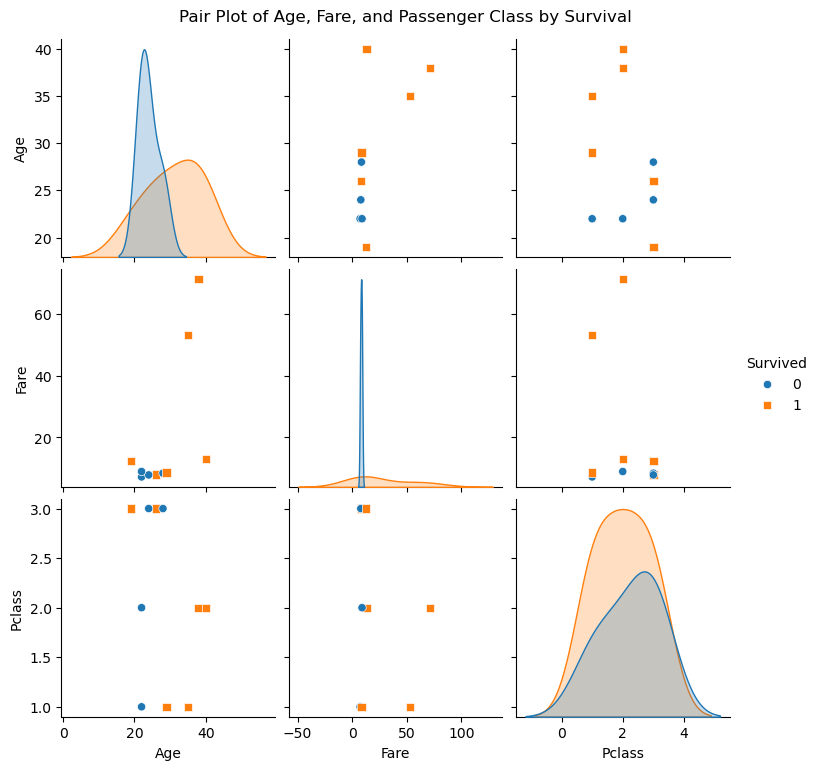

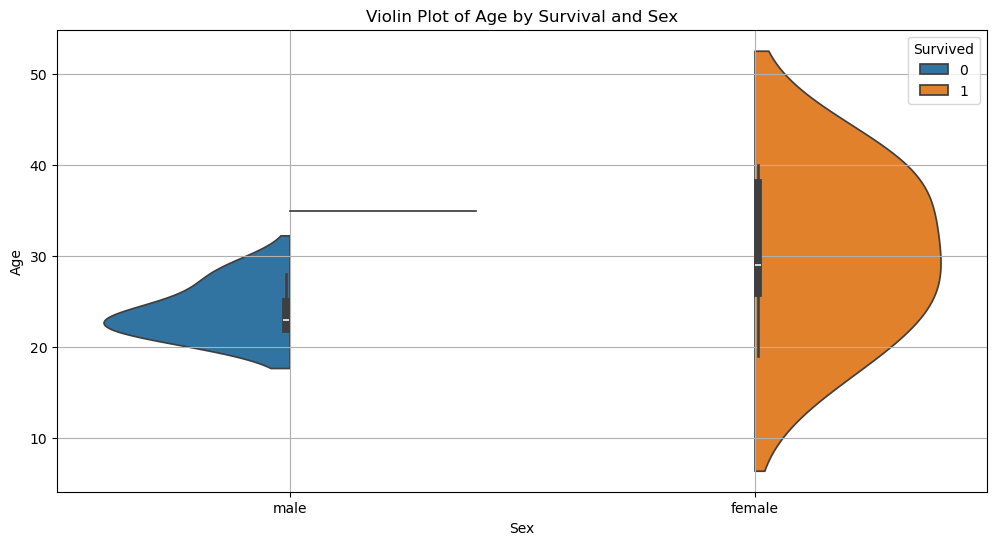

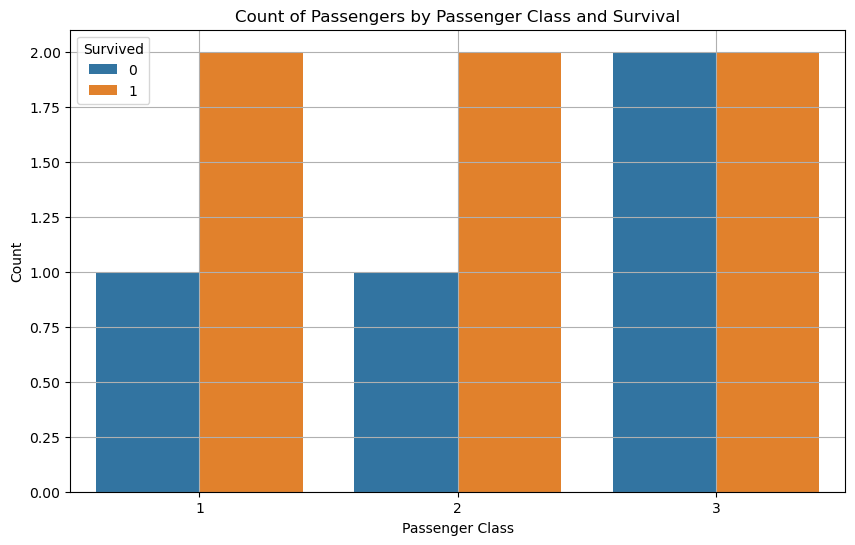

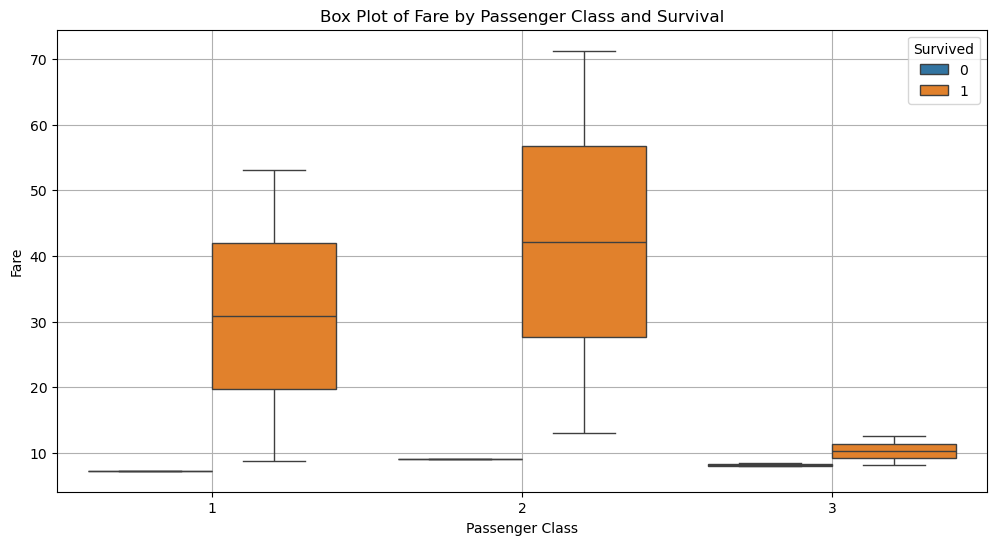

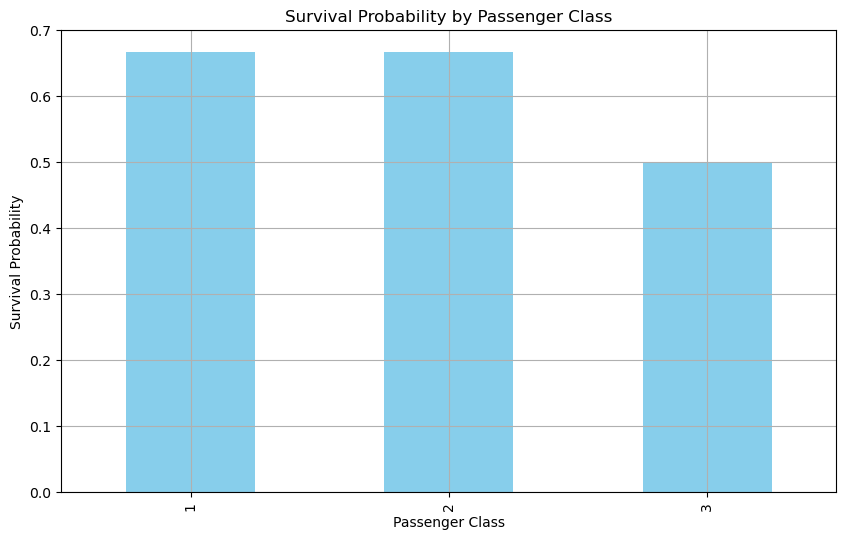

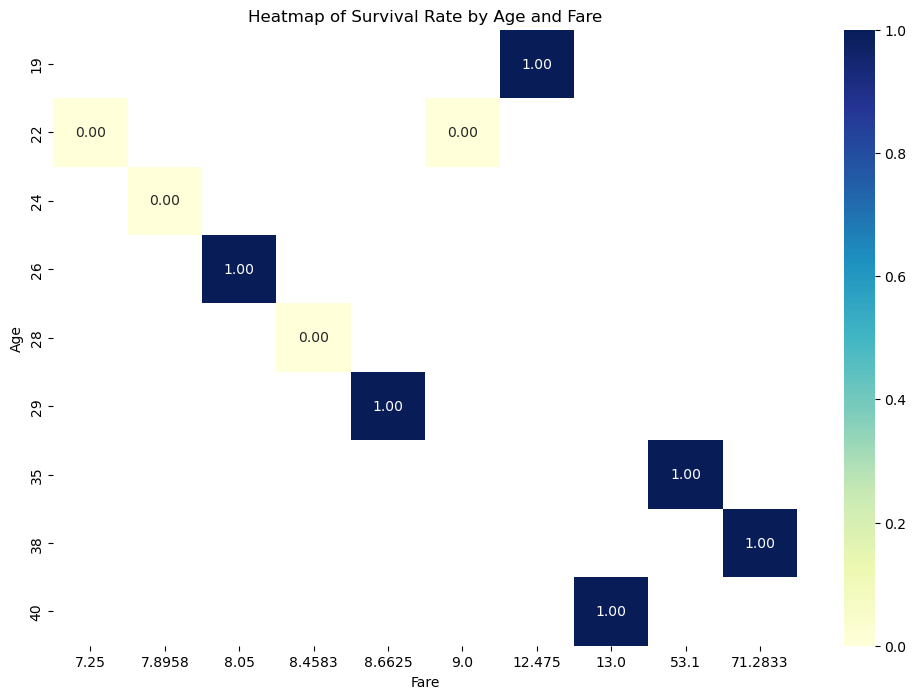

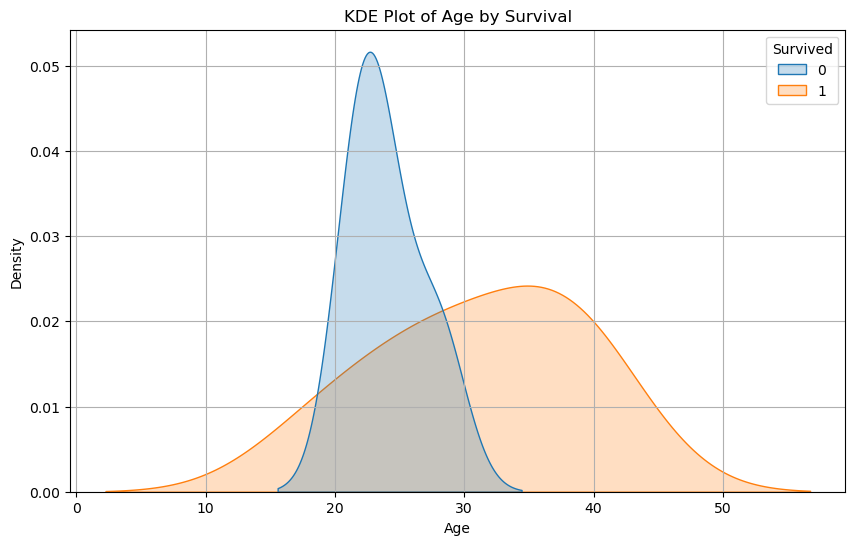

In [1]:
import subprocess
import sys

# Install required packages
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "matplotlib", "seaborn", "pomegranate", "scikit-learn"])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data similar to the Titanic dataset described in AMR2.docx
data = {
    'Pclass': [1, 2, 3, 1, 3, 2, 1, 3, 3, 2],
    'Sex': ['male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'male'],
    'Age': [22, 38, 26, 35, 28, 40, 29, 24, 19, 22],
    'Fare': [7.25, 71.2833, 8.05, 53.1, 8.4583, 13.0, 8.6625, 7.8958, 12.475, 9.0],
    'Survived': [0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
    'Embarked': [0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
}

df = pd.DataFrame(data)

# Pair Plot
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass'], markers=["o", "s"])
plt.suptitle('Pair Plot of Age, Fare, and Passenger Class by Survival', y=1.02)
plt.show()

# Violin Plot of Age by Survival and Sex
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True)
plt.title('Violin Plot of Age by Survival and Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Count Plot of Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Count of Passengers by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Box Plot of Fare by Passenger Class and Survival
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.title('Box Plot of Fare by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# Plotting Survival Probability
plt.figure(figsize=(10, 6))
survival_prob = df.groupby('Pclass')['Survived'].mean()
survival_prob.plot(kind='bar', color='skyblue')
plt.title('Survival Probability by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# Heatmap of Survival Rate by Age and Fare
pivot_table = df.pivot_table(values='Survived', index='Age', columns='Fare', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Heatmap of Survival Rate by Age and Fare')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

# KDE Plot of Age by Survival
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('KDE Plot of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()
